<a href="https://colab.research.google.com/github/EmanoelSantosDados/EmanoelSantosDados/blob/main/PremierLeague.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EM CONSTRUÇÃO**
# **Análise exploratória de dados da Premier League**

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
premier = pd.read_csv('/content/premier ligue.csv')

In [156]:
premier.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,...,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,...,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City


**Excluindo colunas**

In [157]:
premier.columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team'],
      dtype='object')

In [158]:
premier.drop(['Unnamed: 0', 'time', 'comp', 'xg', 'xga', 'captain', 'match report',
              'notes', 'sot', 'dist', 'fk', 'pk', 'pkatt'], axis=1, inplace=True)
premier

,date,round,day,venue,result,gf,ga,opponent,poss,attendance,formation,referee,sh,season,team
0,2020-09-21,Matchweek 2,Mon,Away,W,3,1,Wolves,65,NaN,4-2-3-1,Andre Marriner,13,2024,Manchester City
1,2020-09-27,Matchweek 3,Sun,Home,L,2,5,Leicester City,72,NaN,4-2-3-1,Michael Oliver,16,2024,Manchester City
2,2020-10-03,Matchweek 4,Sat,Away,D,1,1,Leeds United,49,NaN,4-3-3,Mike Dean,23,2024,Manchester City
3,2020-10-17,Matchweek 5,Sat,Home,W,1,0,Arsenal,58,NaN,3-1-4-2,Chris Kavanagh,13,2024,Manchester City
4,2020-10-24,Matchweek 6,Sat,Away,D,1,1,West Ham,69,NaN,4-3-3,Anthony Taylor,14,2024,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,2020-07-07,Matchweek 34,Tue,Away,L,1,2,Watford,56,NaN,4-2-3-1,Anthony Taylor,12,2020,Norwich City
4784,2020-07-11,Matchweek 35,Sat,Home,L,0,4,West Ham,53,NaN,4-2-3-1,Kevin Friend,11,2020,Norwich City
4785,2020-07-14,Matchweek 36,Tue,Away,L,0,1,Chelsea,33,NaN,4-1-4-1,Jonathan Moss,2,2020,Norwich City
4786,2020-07-18,Matchweek 37,Sat,Home,L,0,2,Burnley,42,NaN,4-2-3-1,Kevin Friend,6,2020,Norwich City


In [159]:
premier['round'] = premier['round'].str.replace('Matchweek', '')
premier

,date,round,day,venue,result,gf,ga,opponent,poss,attendance,formation,referee,sh,season,team
0,2020-09-21,2,Mon,Away,W,3,1,Wolves,65,NaN,4-2-3-1,Andre Marriner,13,2024,Manchester City
1,2020-09-27,3,Sun,Home,L,2,5,Leicester City,72,NaN,4-2-3-1,Michael Oliver,16,2024,Manchester City
2,2020-10-03,4,Sat,Away,D,1,1,Leeds United,49,NaN,4-3-3,Mike Dean,23,2024,Manchester City
3,2020-10-17,5,Sat,Home,W,1,0,Arsenal,58,NaN,3-1-4-2,Chris Kavanagh,13,2024,Manchester City
4,2020-10-24,6,Sat,Away,D,1,1,West Ham,69,NaN,4-3-3,Anthony Taylor,14,2024,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,2020-07-07,34,Tue,Away,L,1,2,Watford,56,NaN,4-2-3-1,Anthony Taylor,12,2020,Norwich City
4784,2020-07-11,35,Sat,Home,L,0,4,West Ham,53,NaN,4-2-3-1,Kevin Friend,11,2020,Norwich City
4785,2020-07-14,36,Tue,Away,L,0,1,Chelsea,33,NaN,4-1-4-1,Jonathan Moss,2,2020,Norwich City
4786,2020-07-18,37,Sat,Home,L,0,2,Burnley,42,NaN,4-2-3-1,Kevin Friend,6,2020,Norwich City


**Traduzindo para português**

In [160]:
#Traduzindo colunas português
premier_col = {'date': 'data',
               'day': 'dia',
               'round': 'rodada',
               'venue': 'local',
               'referee': 'arbitro',
               'formation': 'formação_mand',
               'team': 'time',
               'opponent': 'visitante',
               'result': 'resultado',
               'gf': 'gols_mand',
               'ga': 'gols_visit',
               'sh': 'chutes_mand',
               'poss': 'posse_mand',
               'poss.1': 'posse_visit',
               'season': 'temporada',

}

#Traduzindo linhas português
premier_lin = {'Mon': 'Segunda',
               'Tue': 'Terça',
               'Wed': 'Quarta',
               'Thu': 'Quinta',
               'Fri': 'Sexta',
               'Sat': 'Sábado',
               'Sun': 'Domingo',
               'W': 'Vitória',
               'D': 'Empate',
               'L': 'Derrota',
               'Home': 'Mandante',
               'Away': 'Visitante',
}

In [161]:
premier.rename(columns=premier_col, inplace=True)
premier.replace(premier_lin, inplace=True)

premier.copy()

,data,rodada,dia,local,resultado,gols_mand,gols_visit,visitante,posse_mand,attendance,formação_mand,arbitro,chutes_mand,temporada,time
0,2020-09-21,2,Segunda,Visitante,Vitória,3,1,Wolves,65,NaN,4-2-3-1,Andre Marriner,13,2024,Manchester City
1,2020-09-27,3,Domingo,Mandante,Derrota,2,5,Leicester City,72,NaN,4-2-3-1,Michael Oliver,16,2024,Manchester City
2,2020-10-03,4,Sábado,Visitante,Empate,1,1,Leeds United,49,NaN,4-3-3,Mike Dean,23,2024,Manchester City
3,2020-10-17,5,Sábado,Mandante,Vitória,1,0,Arsenal,58,NaN,3-1-4-2,Chris Kavanagh,13,2024,Manchester City
4,2020-10-24,6,Sábado,Visitante,Empate,1,1,West Ham,69,NaN,4-3-3,Anthony Taylor,14,2024,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,2020-07-07,34,Terça,Visitante,Derrota,1,2,Watford,56,NaN,4-2-3-1,Anthony Taylor,12,2020,Norwich City
4784,2020-07-11,35,Sábado,Mandante,Derrota,0,4,West Ham,53,NaN,4-2-3-1,Kevin Friend,11,2020,Norwich City
4785,2020-07-14,36,Terça,Visitante,Derrota,0,1,Chelsea,33,NaN,4-1-4-1,Jonathan Moss,2,2020,Norwich City
4786,2020-07-18,37,Sábado,Mandante,Derrota,0,2,Burnley,42,NaN,4-2-3-1,Kevin Friend,6,2020,Norwich City


In [162]:
#Criando a coluna placar
premier['placar'] = premier['gols_mand'].astype(str) + '-' + premier['gols_visit'].astype(str)
premier

,data,rodada,dia,local,resultado,gols_mand,gols_visit,visitante,posse_mand,attendance,formação_mand,arbitro,chutes_mand,temporada,time,placar
0,2020-09-21,2,Segunda,Visitante,Vitória,3,1,Wolves,65,NaN,4-2-3-1,Andre Marriner,13,2024,Manchester City,3-1
1,2020-09-27,3,Domingo,Mandante,Derrota,2,5,Leicester City,72,NaN,4-2-3-1,Michael Oliver,16,2024,Manchester City,2-5
2,2020-10-03,4,Sábado,Visitante,Empate,1,1,Leeds United,49,NaN,4-3-3,Mike Dean,23,2024,Manchester City,1-1
3,2020-10-17,5,Sábado,Mandante,Vitória,1,0,Arsenal,58,NaN,3-1-4-2,Chris Kavanagh,13,2024,Manchester City,1-0
4,2020-10-24,6,Sábado,Visitante,Empate,1,1,West Ham,69,NaN,4-3-3,Anthony Taylor,14,2024,Manchester City,1-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,2020-07-07,34,Terça,Visitante,Derrota,1,2,Watford,56,NaN,4-2-3-1,Anthony Taylor,12,2020,Norwich City,1-2
4784,2020-07-11,35,Sábado,Mandante,Derrota,0,4,West Ham,53,NaN,4-2-3-1,Kevin Friend,11,2020,Norwich City,0-4
4785,2020-07-14,36,Terça,Visitante,Derrota,0,1,Chelsea,33,NaN,4-1-4-1,Jonathan Moss,2,2020,Norwich City,0-1
4786,2020-07-18,37,Sábado,Mandante,Derrota,0,2,Burnley,42,NaN,4-2-3-1,Kevin Friend,6,2020,Norwich City,0-2


In [165]:
#Criando a coluna posse_vist
premier['posse_visit'] = 100 - premier['posse_mand']
premier

,data,rodada,dia,local,resultado,gols_mand,gols_visit,visitante,posse_mand,attendance,formação_mand,arbitro,chutes_mand,temporada,time,placar,posse_visit
0,2020-09-21,2,Segunda,Visitante,Vitória,3,1,Wolves,65,NaN,4-2-3-1,Andre Marriner,13,2024,Manchester City,3-1,35
1,2020-09-27,3,Domingo,Mandante,Derrota,2,5,Leicester City,72,NaN,4-2-3-1,Michael Oliver,16,2024,Manchester City,2-5,28
2,2020-10-03,4,Sábado,Visitante,Empate,1,1,Leeds United,49,NaN,4-3-3,Mike Dean,23,2024,Manchester City,1-1,51
3,2020-10-17,5,Sábado,Mandante,Vitória,1,0,Arsenal,58,NaN,3-1-4-2,Chris Kavanagh,13,2024,Manchester City,1-0,42
4,2020-10-24,6,Sábado,Visitante,Empate,1,1,West Ham,69,NaN,4-3-3,Anthony Taylor,14,2024,Manchester City,1-1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,2020-07-07,34,Terça,Visitante,Derrota,1,2,Watford,56,NaN,4-2-3-1,Anthony Taylor,12,2020,Norwich City,1-2,44
4784,2020-07-11,35,Sábado,Mandante,Derrota,0,4,West Ham,53,NaN,4-2-3-1,Kevin Friend,11,2020,Norwich City,0-4,47
4785,2020-07-14,36,Terça,Visitante,Derrota,0,1,Chelsea,33,NaN,4-1-4-1,Jonathan Moss,2,2020,Norwich City,0-1,67
4786,2020-07-18,37,Sábado,Mandante,Derrota,0,2,Burnley,42,NaN,4-2-3-1,Kevin Friend,6,2020,Norwich City,0-2,58


In [167]:
#Ordenando as colunas
premier = premier[['data', 'dia', 'rodada', 'local', 'arbitro', 'formação_mand', 'time',
                   'visitante', 'resultado', 'placar', 'gols_mand', 'gols_visit', 'posse_mand',
                   'posse_visit', 'chutes_mand', 'temporada']
]
premier.head()

,data,dia,rodada,local,arbitro,formação_mand,time,visitante,resultado,placar,gols_mand,gols_visit,posse_mand,posse_visit,chutes_mand,temporada
0,2020-09-21,Segunda,2,Visitante,Andre Marriner,4-2-3-1,Manchester City,Wolves,Vitória,3-1,3,1,65,35,13,2024
1,2020-09-27,Domingo,3,Mandante,Michael Oliver,4-2-3-1,Manchester City,Leicester City,Derrota,2-5,2,5,72,28,16,2024
2,2020-10-03,Sábado,4,Visitante,Mike Dean,4-3-3,Manchester City,Leeds United,Empate,1-1,1,1,49,51,23,2024
3,2020-10-17,Sábado,5,Mandante,Chris Kavanagh,3-1-4-2,Manchester City,Arsenal,Vitória,1-0,1,0,58,42,13,2024
4,2020-10-24,Sábado,6,Visitante,Anthony Taylor,4-3-3,Manchester City,West Ham,Empate,1-1,1,1,69,31,14,2024


In [176]:
#Mandante com mais vitoria temporada 2024
premier[(premier['temporada'] == 2024) & (premier['resultado'] == 'Vitória')]['time'].value_counts()

,count
time,
Manchester City,55
Arsenal,46
Liverpool,44
Manchester United,39
Tottenham Hotspur,38
Chelsea,37
Aston Villa,36
West Ham United,33
Newcastle United,30


<Axes: xlabel='time'>

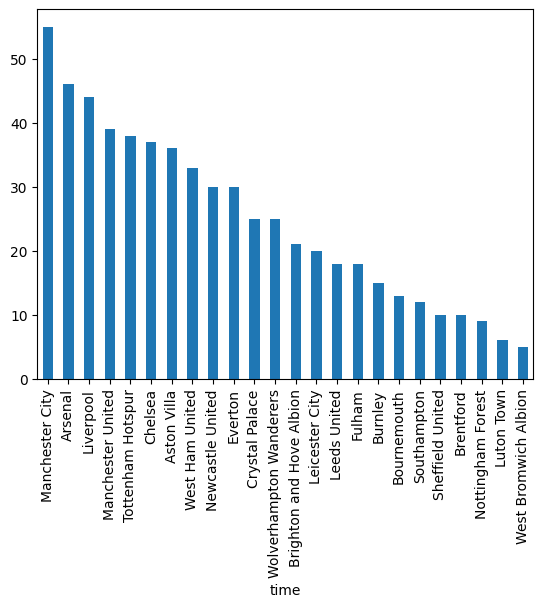

In [177]:
#Plotando
premier[(premier['temporada'] == 2024) & (premier['resultado'] == 'Vitória')]['time'].value_counts().plot(kind='bar')